#  Data Analytics and Machine Learning of the Data space in Granular Flow
    *Training and Developing the Machine Learning model with 30 time_steps

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [3]:
#pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)

In [4]:
# !7z x ./Tables\ \(Data\ set\).zip

In [5]:
# !rm -rf ./Tables\ \(Data\ set\)

# 1.0 Combining the data gathered for each time step into a single csv file

In [6]:
# granular_flow_data_paths=[]

# tot=np.arange(10000,50100,100)
# for i in tot:
#     a=[f'/content/Tables (Data set)/XYZ_Internal_Table_table_{i}.csv']
#     granular_flow_data_paths+=a


# granular_flow_dataset = []
# for datapath in granular_flow_data_paths:
# #     print(datapath)
#     df=pd.read_csv(datapath)
#     granular_flow_dataset.append(df)


In [7]:
# len(granular_flow_dataset)

In [8]:
# y=pd.concat(granular_flow_dataset)
# Combined_flow_data=y.to_csv('./Combined flow data(#30).csv')
# Combined_flow_data

# 2.0 Working With the Saved file

## 2.1 Reading (Loading) the combined saved data

In [9]:
# import sys
import tensorflow as tf
tf.config.run_functions_eagerly(True)
print('TF version:', tf.__version__)

version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras



import subprocess

try:
    subprocess.check_output('nvidia-smi')
    print('Nvidia GPU detected!')
except Exception: # this command not being found can raise quite a few different errors depending on the configuration
    print('No Nvidia GPU in system!')




print('GPU', 'available (YES!!!!!)' if tf.config.list_physical_devices('GPU') else 'not available :(')



len(tf.config.experimental.list_physical_devices('GPU'))

2024-12-27 06:16:38.709545: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version: 2.12.0
No Nvidia GPU in system!
GPU available (YES!!!!!)


1

In [10]:
# !pip install tensorflow-macos

In [11]:

Granular_flow_data= pd.read_csv('../Position - DNN2 (done on school Mac)/Combined flow data(#30).csv')

Granular_flow_data.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
Granular_flow_data

,Index,Time (s),Volume Fraction of Phase 1,Report: Sum KE (J),Report: Sum WallStress (Pa),Parcel Centroid[X] (m),Parcel Centroid[Y] (m),Particle Velocity: Magnitude (m/s),Particle Velocity[j] (m/s),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s),X (m),Y (m),Z (m)
0,0,10.0,0.174704,0.003907,0.008035,0.031825,0.022352,0.603468,3.588897e-04,0.000501,0.603379,0.010375,0.031825,0.022352,0.000501
1,1,10.0,0.174704,0.003907,0.008035,0.027128,0.022352,0.484547,-1.789327e-03,0.000499,0.484467,0.008608,0.027128,0.022352,0.000499
2,2,10.0,0.174704,0.003907,0.008035,0.027052,0.023337,0.603346,9.335324e-04,0.000642,0.602915,0.022796,0.027052,0.023337,0.000642
3,3,10.0,0.174704,0.003907,0.008035,0.023665,0.022372,0.565108,2.904427e-03,0.000511,0.565076,0.005253,0.023665,0.022372,0.000511
4,4,10.0,0.174704,0.003907,0.008035,0.030634,0.023345,0.590112,-1.146731e-01,0.000500,0.578862,-0.001059,0.030634,0.023345,0.000500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13410144,33350,50.0,0.040762,0.003920,0.008333,-0.117258,0.036990,0.549452,9.907611e-08,0.019726,0.538740,-0.107966,-0.117258,0.036990,0.019726
13410145,33351,50.0,0.095765,0.003920,0.008333,-0.117261,0.033381,0.549401,-2.571163e-07,0.002363,0.538698,-0.107914,-0.117261,0.033381,0.002363
13410146,33352,50.0,0.168274,0.003920,0.008333,-0.117269,0.028676,0.549299,-1.910868e-08,0.002854,0.538615,-0.107810,-0.117269,0.028676,0.002854
13410147,33353,50.0,0.056356,0.003920,0.008333,-0.117272,0.027990,0.549250,-5.728731e-08,0.013622,0.538576,-0.107759,-0.117272,0.027990,0.013622


In [12]:
Granular_flow_data = Granular_flow_data.drop(['Volume Fraction of Phase 1','Report: Sum KE (J)', 
                                              'Report: Sum WallStress (Pa)', 'X (m)',	'Y (m)',	'Z (m)', 
                                              'Parcel Centroid[Y] (m)', 'Particle Velocity[j] (m/s)'], axis='columns')
Granular_flow_data = Granular_flow_data
Granular_flow_data

,Index,Time (s),Parcel Centroid[X] (m),Particle Velocity: Magnitude (m/s),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
0,0,10.0,0.031825,0.603468,0.000501,0.603379,0.010375
1,1,10.0,0.027128,0.484547,0.000499,0.484467,0.008608
2,2,10.0,0.027052,0.603346,0.000642,0.602915,0.022796
3,3,10.0,0.023665,0.565108,0.000511,0.565076,0.005253
4,4,10.0,0.030634,0.590112,0.000500,0.578862,-0.001059
...,...,...,...,...,...,...,...
13410144,33350,50.0,-0.117258,0.549452,0.019726,0.538740,-0.107966
13410145,33351,50.0,-0.117261,0.549401,0.002363,0.538698,-0.107914
13410146,33352,50.0,-0.117269,0.549299,0.002854,0.538615,-0.107810
13410147,33353,50.0,-0.117272,0.549250,0.013622,0.538576,-0.107759


## Finding patterns in the data using correlation matrix

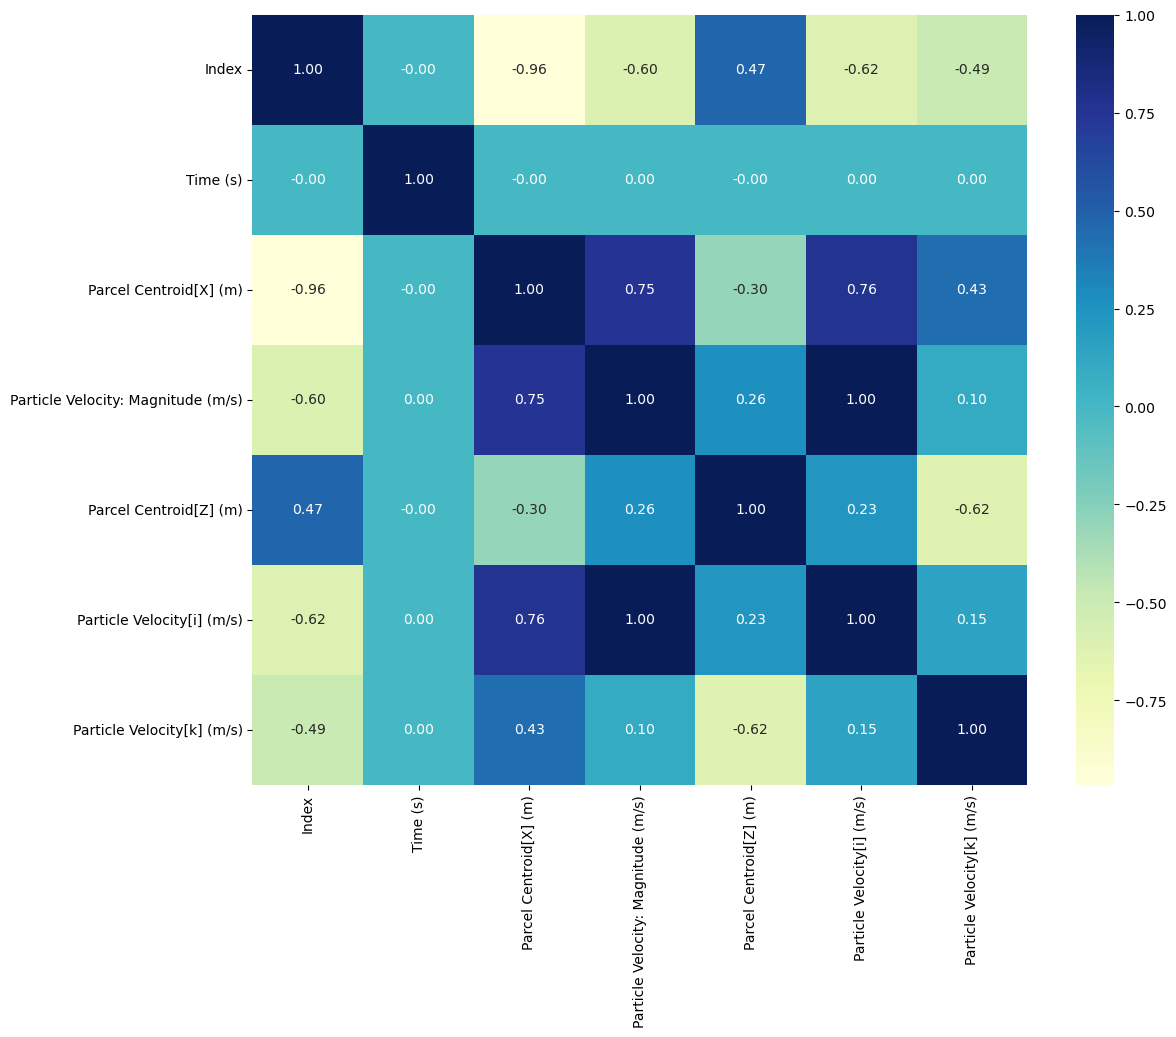

In [13]:
import seaborn as sns

corr_matrix =Granular_flow_data.corr()

fig, ax_corr_Matrix=plt.subplots(figsize=(12.5,10))

color = plt.get_cmap('YlGnBu')   # default color
color.set_bad('lightblue')

ax =sns.heatmap(corr_matrix,
                annot=True,
                fmt=".2f",
                cmap=color
               )
fig.savefig('./Correlation_matrix_for_the_data(#30).png', bbox_inches='tight', dpi=1200)

plt.show()

In [14]:
# pip install seaborn

## 2.2 Splitting the data

In [15]:

X=Granular_flow_data.drop(['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)'], axis=1)
y= Granular_flow_data[['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)']]


In [16]:
X

,Index,Time (s),Particle Velocity: Magnitude (m/s),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
0,0,10.0,0.603468,0.603379,0.010375
1,1,10.0,0.484547,0.484467,0.008608
2,2,10.0,0.603346,0.602915,0.022796
3,3,10.0,0.565108,0.565076,0.005253
4,4,10.0,0.590112,0.578862,-0.001059
...,...,...,...,...,...
13410144,33350,50.0,0.549452,0.538740,-0.107966
13410145,33351,50.0,0.549401,0.538698,-0.107914
13410146,33352,50.0,0.549299,0.538615,-0.107810
13410147,33353,50.0,0.549250,0.538576,-0.107759


In [17]:
y

,Parcel Centroid[X] (m),Parcel Centroid[Z] (m)
0,0.031825,0.000501
1,0.027128,0.000499
2,0.027052,0.000642
3,0.023665,0.000511
4,0.030634,0.000500
...,...,...
13410144,-0.117258,0.019726
13410145,-0.117261,0.002363
13410146,-0.117269,0.002854
13410147,-0.117272,0.013622


## 2.3 Checking if there is any missing value in our data
            * If there is any non-numerical value, we perform feature encoding
            * And/ or if there is any missing value, we perform imputation
            * If no missing value, then we continue to building the machine Learning Model

In [18]:
X.isna().sum()

Index                                 0
Time (s)                              0
Particle Velocity: Magnitude (m/s)    0
Particle Velocity[i] (m/s)            0
Particle Velocity[k] (m/s)            0
dtype: int64

In [19]:
y.isna().sum()

Parcel Centroid[X] (m)    0
Parcel Centroid[Z] (m)    0
dtype: int64

# 3.0 Building and Training the Machine Learning Model for our Data

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
%%time

np.random.seed(42)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                   test_size=0.2)



CPU times: user 1.98 s, sys: 229 ms, total: 2.21 s
Wall time: 2.35 s


In [22]:
from sklearn.preprocessing import StandardScaler

# Scale input features
input_scaler = StandardScaler()
X_train = input_scaler.fit_transform(X_train)
X_test = input_scaler.transform(X_test)

# Scale outputs
output_scaler = StandardScaler()
y_train = output_scaler.fit_transform(y_train)
y_test = output_scaler.transform(y_test)

In [23]:
model =tf.keras.Sequential()
model.add(Dense(9, activation='relu', input_shape= (X_train.shape[1],) ))
model.add(Dense(80, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(80, activation='tanh'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(200, activation='relu'))

#Output layer
model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])

model.summary()

2024-12-27 06:17:22.392192: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-27 06:17:22.392251: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 54        
                                                                 
 dense_1 (Dense)             (None, 80)                800       
                                                                 
 dense_2 (Dense)             (None, 80)                6480      
                                                                 
 dense_3 (Dense)             (None, 80)                6480      
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [24]:
# history = model.fit(X_train, y_train, epochs = 100, validation_split=0.2)

## 3.1 Predicting with our model

In [25]:
%load_ext tensorboard

In [26]:
import datetime
import os

def create_tensorboard_callback():
  logdir = os.path.join("./logs",
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
                        )

  return tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [27]:
# Early Stopping Callback
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae',
                                                  patience=3)

In [28]:
tf.data.experimental.enable_debug_mode()

history = model.fit(X_train, y_train,
                    epochs = 100,
                    validation_data=(X_test, y_test),
                    validation_freq=1,batch_size=22500,
                    callbacks=[create_tensorboard_callback(), early_stopping]
                    )

Epoch 1/100
477/477 [==============================] - 1914s 4s/step - loss: 0.1100 - mae: 0.1977 - val_loss: 0.0829 - val_mae: 0.1646
Epoch 2/100
477/477 [==============================] - 2252s 5s/step - loss: 0.0808 - mae: 0.1591 - val_loss: 0.0791 - val_mae: 0.1558
Epoch 3/100
477/477 [==============================] - 1053s 2s/step - loss: 0.0787 - mae: 0.1557 - val_loss: 0.0780 - val_mae: 0.1541
Epoch 4/100
477/477 [==============================] - 126s 263ms/step - loss: 0.0776 - mae: 0.1540 - val_loss: 0.0769 - val_mae: 0.1527
Epoch 5/100
477/477 [==============================] - 1037s 2s/step - loss: 0.0765 - mae: 0.1529 - val_loss: 0.0762 - val_mae: 0.1518
Epoch 6/100
477/477 [==============================] - 8305s 17s/step - loss: 0.0752 - mae: 0.1517 - val_loss: 0.0746 - val_mae: 0.1523
Epoch 7/100
477/477 [==============================] - 1130s 2s/step - loss: 0.0741 - mae: 0.1503 - val_loss: 0.0740 - val_mae: 0.1504
Epoch 8/100
477/477 [==============================]

In [29]:
# os.environ['TENSORBOARD_BINARY'] = r"C:\ProgramData\anaconda3\envs\colab_deeplearning_env\Scripts\tensorboard.exe"

# %tensorboard --logdir ./logs --host localhost

## Predicting with our Model

In [30]:
y_preds = model.predict(X_test, batch_size=22500)
y_preds

120/120 [==============================] - 3s 21ms/step


array([[-1.4859327 ,  1.8717961 ],
       [ 1.3974546 ,  0.80336314],
       [ 0.31771755,  0.29121497],
       ...,
       [-0.8719907 , -0.2965622 ],
       [ 0.30251202,  0.8651827 ],
       [-0.6915738 , -0.16684365]], dtype=float32)

In [31]:
# y_pred = output_scaler.inverse_transform(y_preds)  # reverse scaling
# y_test_orig = output_scaler.inverse_transform(y_test)  # reverse scaling for test data
# y_pred

In [32]:
y_preds = pd.DataFrame(y_preds, columns=['predicted Parcel Centroid[X] (m)',	'predicted Parcel Centroid[Z] (m)'])
y_preds

,predicted Parcel Centroid[X] (m),predicted Parcel Centroid[Z] (m)
0,-1.485933,1.871796
1,1.397455,0.803363
2,0.317718,0.291215
3,-0.344086,-0.561579
4,0.727077,0.311165
...,...,...
2682025,0.655064,-0.180571
2682026,-1.163839,-0.503906
2682027,-0.871991,-0.296562
2682028,0.302512,0.865183


In [33]:
y_test

array([[-1.46373988,  2.82129814],
       [ 1.3834501 ,  0.65717382],
       [ 0.30098246,  0.35622598],
       ...,
       [-0.93075033, -0.76469761],
       [ 0.29059953,  0.91524451],
       [-0.72455257, -0.5155353 ]])

In [34]:
# y_test_orig

## 3.2 Scoring our model

In [35]:
model.evaluate(X_test, y_test,batch_size =22500, verbose=1)


120/120 [==============================] - 5s 46ms/step - loss: 0.0708 - mae: 0.1455


[0.07079091668128967, 0.1454937756061554]

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [37]:
r2 = r2_score(y_test, y_preds)
print(f"R² Score: {r2}")

R² Score: 0.9292204847942933


In [38]:
# score30_table.to_csv('#30scores.csv')

In [57]:
metrics ={"r-squared": r2_score, 
          "Mean absolute error (MAE)": mean_absolute_error, 
          "Mean squared error(MSE)":mean_squared_error,
          
          
         }
DNN_scores={}

for key,value in metrics.items():
    DNN_scores[key]=value(y_test, y_preds)


DNN_scores

{'r-squared': 0.9292204847942933,
 'Mean absolute error (MAE)': 0.14549374386088731,
 'Mean squared error(MSE)': 0.07079091437135489}

In [40]:
scores_table= pd.DataFrame(DNN_scores.values(), index=DNN_scores.keys(), columns=["Values"])
scores_table.to_csv('#DNN_scores.csv')
scores_table

,Values
r-squared,0.929220
Mean absolute error (MAE),0.145494
Mean squared error(MSE),0.070791


# 4.0 Plotting the Data
Plotting at the first time-index of the test data This is equivalent to the zeroth index
We can do the same for other indexes

In [41]:
actual_Xi = pd.DataFrame(y_test).iloc[:, :1]
actual_Xk=pd.DataFrame(y_test, columns=['Parcel Centroid[X] (m)', 'Parcel Centroid[Z] (m)']).iloc[:, :2].drop(['Parcel Centroid[X] (m)'], axis =1)

predicted_Xi = y_preds.iloc[:, :1]
predicted_Xk = y_preds.iloc[:, :2].drop(['predicted Parcel Centroid[X] (m)'], axis =1)

In [42]:
actual_Xk

,Parcel Centroid[Z] (m)
0,2.821298
1,0.657174
2,0.356226
3,-0.976272
4,0.450080
...,...
2682025,-0.339566
2682026,-0.603861
2682027,-0.764698
2682028,0.915245


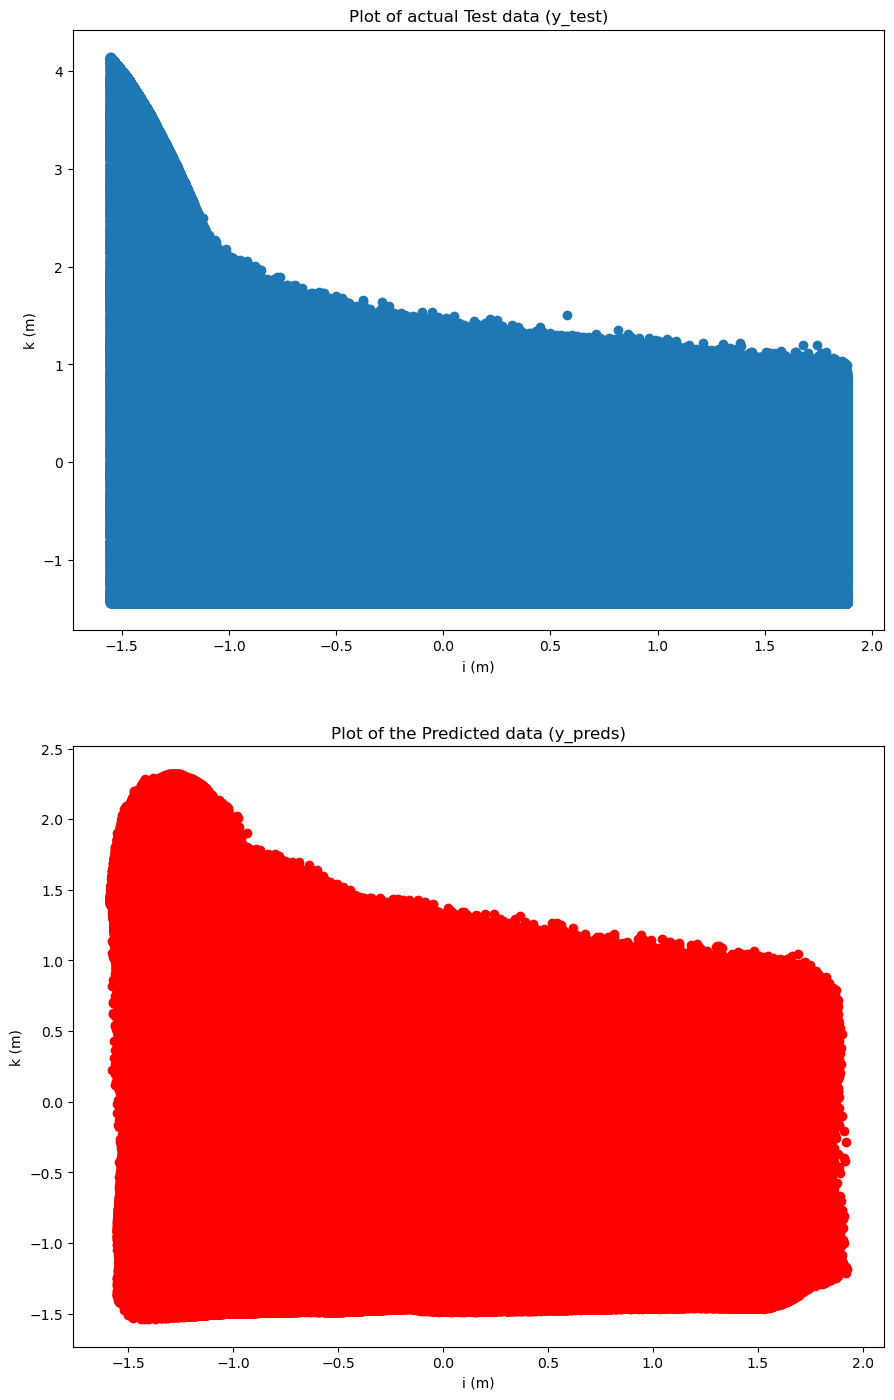

In [43]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,15))

ax1.scatter(actual_Xi, actual_Xk)
ax2.scatter(predicted_Xi, predicted_Xk, color='red')

ax1.set(title="Plot of actual Test data (y_test)",
              xlabel='i (m)',
              ylabel='k (m)'
             )
fig.tight_layout(pad=5)

ax2.set(title= "Plot of the Predicted data (y_preds)",
        xlabel= 'i (m)',
        ylabel='k (m)'
       )

plt.savefig("./Separate plots of Actual and Predicted granules Position(#30).png", dpi=1200)
plt.show()

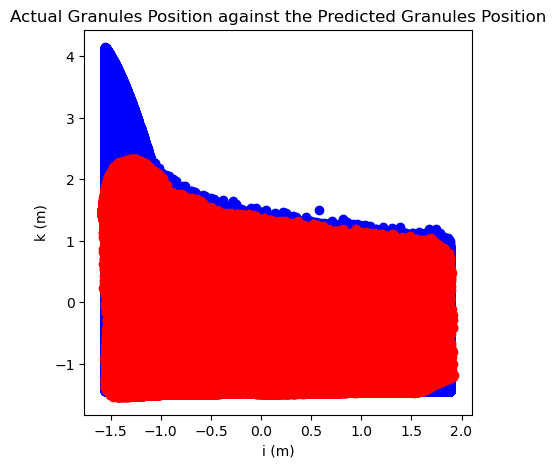

In [44]:
fig, ax3 =plt.subplots(1,1,figsize=(5,5))

ax3.scatter(actual_Xi, actual_Xk, color ='blue')

ax3.scatter(predicted_Xi, predicted_Xk, color='red')

ax3.set(title="Actual Granules Position against the Predicted Granules Position",
      xlabel="i (m)",
      ylabel="k (m)"
       )

plt.savefig('./Actual vs Predicted(#30).png', dpi=1200)
plt.show()

In [45]:
predicted_Xi

,predicted Parcel Centroid[X] (m)
0,-1.485933
1,1.397455
2,0.317718
3,-0.344086
4,0.727077
...,...
2682025,0.655064
2682026,-1.163839
2682027,-0.871991
2682028,0.302512


In [46]:
predicted_Xk

,predicted Parcel Centroid[Z] (m)
0,1.871796
1,0.803363
2,0.291215
3,-0.561579
4,0.311165
...,...
2682025,-0.180571
2682026,-0.503906
2682027,-0.296562
2682028,0.865183


## 4.2 Separate 3D plots of the Actual Granules Position and the Predicted Granules Position

In [47]:
Granular_flow_data.tail()

,Index,Time (s),Parcel Centroid[X] (m),Particle Velocity: Magnitude (m/s),Parcel Centroid[Z] (m),Particle Velocity[i] (m/s),Particle Velocity[k] (m/s)
13410144,33350,50.0,-0.117258,0.549452,0.019726,0.538740,-0.107966
13410145,33351,50.0,-0.117261,0.549401,0.002363,0.538698,-0.107914
13410146,33352,50.0,-0.117269,0.549299,0.002854,0.538615,-0.107810
13410147,33353,50.0,-0.117272,0.549250,0.013622,0.538576,-0.107759
13410148,33354,50.0,-0.117272,0.549250,0.004727,0.538575,-0.107759


# Predicting the velocity

In [48]:
# U=Granular_flow_data.drop(["Parcel Centroid[X] (m)", "Parcel Centroid[Y] (m)", "Parcel Centroid[Z] (m)", "Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)", "Particle Velocity: Magnitude (m/s)"], axis=1)
# U

In [49]:
# U["Wall Shear Stress: Magnitude (Pa)"].describe()

In [50]:
# v=Granular_flow_data[["Particle Velocity[i] (m/s)", "Particle Velocity[j] (m/s)", "Particle Velocity[k] (m/s)"]]
# v

In [51]:
# %%time

# U_train, U_test, v_train, v_test=train_test_split(U,v,
#                                                   test_size=0.2,
#                                                   random_state=42)

# velocity_model1= RandomForestRegressor(n_estimators=200)
# velocity_model1.fit(U_train, v_train)

In [52]:
# velocity_model1.score(U_test, v_test)

In [53]:
y_preds

,predicted Parcel Centroid[X] (m),predicted Parcel Centroid[Z] (m)
0,-1.485933,1.871796
1,1.397455,0.803363
2,0.317718,0.291215
3,-0.344086,-0.561579
4,0.727077,0.311165
...,...,...
2682025,0.655064,-0.180571
2682026,-1.163839,-0.503906
2682027,-0.871991,-0.296562
2682028,0.302512,0.865183


In [54]:

y_test_Originaltocsv=pd.DataFrame(
    {
        'yi_scaled': y_test[:, 0],
        'yk_scaled': y_test[:,1],
        
        })
y_pred_tocsv = pd.DataFrame(
    {
        'yi_pred_scaled': y_preds.iloc[:, 0],
        'yk_pred_scaled': y_preds.iloc[:,1],
        
        }
    )

DNN_test_n_predicted_data= pd.concat([y_test_Originaltocsv, y_pred_tocsv], axis=1)
DNN_test_n_predicted_data = DNN_test_n_predicted_data.to_csv('(Constant)DNN_test_n_predicted_data.csv')
DNN_test_n_predicted_data

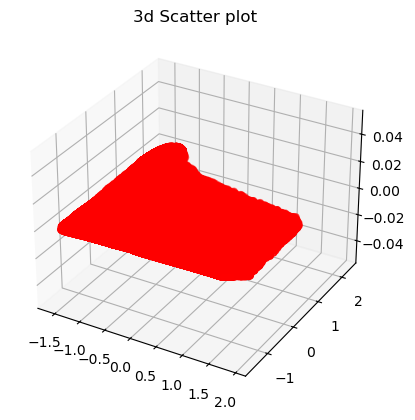

In [55]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


ax.scatter(y_preds.iloc[:,0], y_preds.iloc[:,1], color = 'red')

# syntax for plotting
ax.set_title('3d Scatter plot')
plt.show()


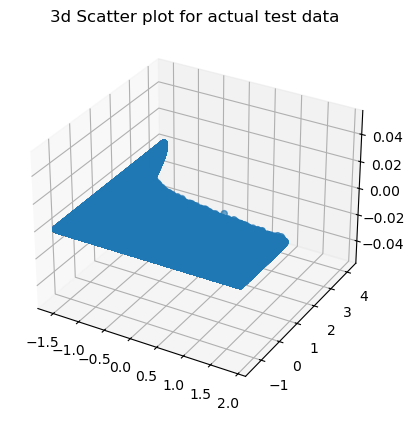

In [56]:
fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')


ax.scatter(y_test[:,0], y_test[:,1])

# syntax for plotting
ax.set_title('3d Scatter plot for actual test data')
plt.show()